<a href="https://colab.research.google.com/github/krishnavarathan/python-data-analysis/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import bbox_artist
sns.set()

# Creating a floder in Google Drive and saving the created charts

In [482]:
# importing the os module
# listing the drive folders
import os
os.listdir('/content/drive/MyDrive') # /content/drive/MyDrive

['Mark Sheets ',
 'Personal Documents ',
 'Certificates ',
 'Resume ',
 'Colab Notebooks',
 'Data Analyst Course',
 'Lending-Company-Numeric-Data.csv',
 'Lending-Company-Numeric-Data-NAN.csv',
 'Lending-Company-Total-Price.csv',
 'Lending-Company-Saving.csv',
 'Customer-Gender.csv',
 'Lending-company-100.csv',
 'Intro-to-NumPy-Exercise (1).ipynb',
 'Saving-Data-NP-Solution.ipynb',
 'Pandas_Exercises',
 'Personal_Learning_Hours.gsheet',
 'Loan_Data',
 'Absenteesim',
 'Machine Learninng',
 'bar_chart_data.csv',
 'bar_chart_homework_data.csv',
 'pie_chart_data.csv',
 'stacked_area_chart_data.csv',
 'area_chart_homework_data.csv',
 'line_chart_data.csv',
 'returns1020.csv',
 'histogram_survey_data.csv',
 'histogram_data.csv',
 'scatter_data.csv',
 'student_scores_data.csv',
 'scatter_plot_ii.csv',
 'bar_line_chart_homework.csv',
 'bar_line_chart_data.csv']

In [483]:
# Creating a Folder
try:
  new_folder='/content/drive/MyDrive/Data-Visualization'
  os.makedirs(new_folder, exist_ok=True)
  print('Folder cretaed success')
except Exception as e:
  print(f'Unable to create the Folder!{e}')

Folder cretaed success


In [484]:
data=pd.read_csv('/content/drive/MyDrive/bar_chart_data.csv')
data

,Brand,Cars Listings
0,Audi,419
1,BMW,636
2,Mercedes-Benz,820
3,Mitsubishi,306
4,Renault,438
5,Toyota,509
6,Volkswagen,875


# Bar Chart

Image saved successfully in drive


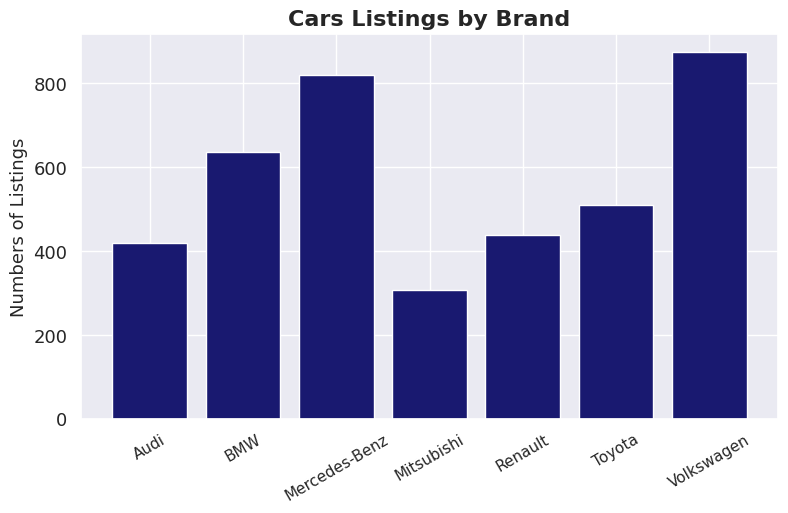

In [485]:
plt.figure(figsize=(9,5)) # Expanding the size
plt.bar(x = data['Brand'], # Setting x lable
        height=data['Cars Listings'], # Setting y lable
        color='midnightblue'
        )
plt.xticks(rotation=30) # Rotating the X axis each values
plt.yticks(fontsize=13) # Setting the font size each x values
plt.ylabel('Numbers of Listings', fontsize=13)
plt.title('Cars Listings by Brand', fontsize=16, weight='bold')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Bar_Chart.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# Updating and Recalculating Total Frequency in DataFrame

1. Load the dataset
2. Extract column names
3. Extract the existing Total row
4. Remove the Total row from main DataFrame
5. Create a new row (Australia)
6. Merge data using NumPy vertical stacking
7. Convert NumPy array back to Pandas DataFrame
8. Recalculate Total using vectorized operation



In [486]:
bar=pd.read_csv('/content/drive/MyDrive/bar_chart_homework_data.csv')
print(type(bar))
cols=bar.columns # Extracting the column names
print(cols)

lst=bar.loc[[bar.index[-1]]] # last column
bar=bar.iloc[:-1,:] # all rows expect row

aus=np.array(['Australlia',32030]) # creating a new data, to add to the existing dataframe
aus=np.reshape(aus, (1,2)) # Reshape the craated series

bar=np.vstack((cols, bar)) # mergint the column name
bar=np.vstack((bar, aus)) # merging the created series
bar=np.vstack((bar, lst)) # merging the last row

bar=pd.DataFrame(bar) # chnge the array into DataFrame
bar.columns = bar.iloc[0] # setting the 1st row as column agian
bar = bar[1:] # removing the 1 row(duplicate)

bar.loc[bar["Cities"] == "Total", "Frequency"] = bar.loc[bar["Cities"] != "Total", "Frequency"].astype(int).sum()
bar['Frequency'] = bar['Frequency'].astype(int)
bar

<class 'pandas.core.frame.DataFrame'>
Index(['Cities', 'Frequency'], dtype='object')


,Cities,Frequency
1,New York,12327
2,LA,17129
3,San Francisco,19923
4,Australlia,32030
5,Total,81409


Image saved successfully in drive


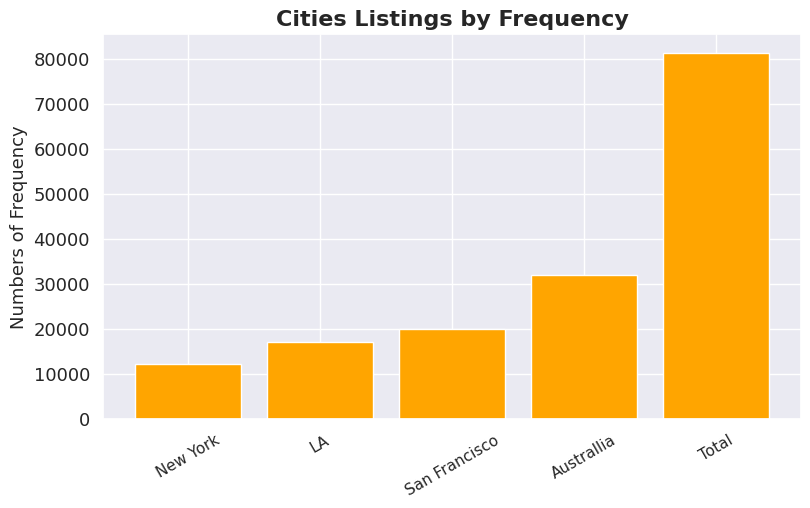

In [487]:
try:
  plt.figure(figsize=(9,5)) # Expanding the size
  plt.bar(x = bar['Cities'], # Setting x lable
          height=bar['Frequency'], # Setting y lable
          color='orange'
          )
  plt.xticks(rotation=30) # Rotating the X axis each values
  plt.yticks(fontsize=13) # Setting the font size each x values
  plt.ylabel('Numbers of Frequency', fontsize=13)
  plt.title('Cities Listings by Frequency', fontsize=16, weight='bold')
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Bar_Chart-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# Pie Chart

In [488]:
pie_chart=pd.read_csv('/content/drive/MyDrive/pie_chart_data.csv')

In [489]:
pie_chart

,Engine Fuel Type,Number of Cars
0,Diesel,2019
1,Gas,613
2,Other,154
3,Petrol,1559


Image saved successfully in drive


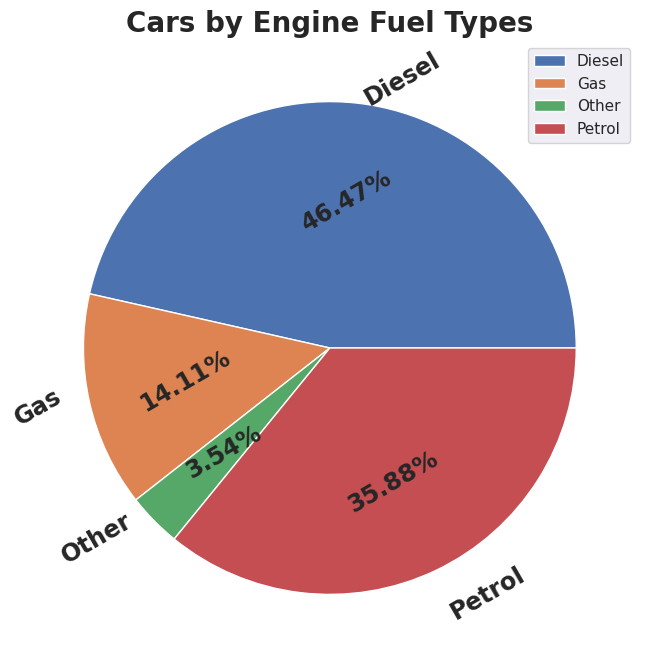

In [490]:
plt.figure(figsize=(10,8))
plt.pie(pie_chart['Number of Cars'],
        labels=pie_chart['Engine Fuel Type'].values,
        autopct='%.2f%%',
        textprops={'size':'x-large',
                   'fontweight':'bold',
                   'rotation':30}
        )
plt.title('Cars by Engine Fuel Types', fontsize=20, fontweight='bold')
plt.legend()
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Pie_Chart.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

## 1. Stacked Area chart

In [491]:
sdf=pd.read_csv('/content/drive/MyDrive/stacked_area_chart_data.csv')
sdf.head()

,Year,Gas,Petrol,Diesel,Other
0,1982,0,94,0,0
1,1983,0,347,0,0
2,1984,300,0,334,0
3,1985,1030,1184,984,0
4,1986,511,681,1066,340


Image saved successfully in drive


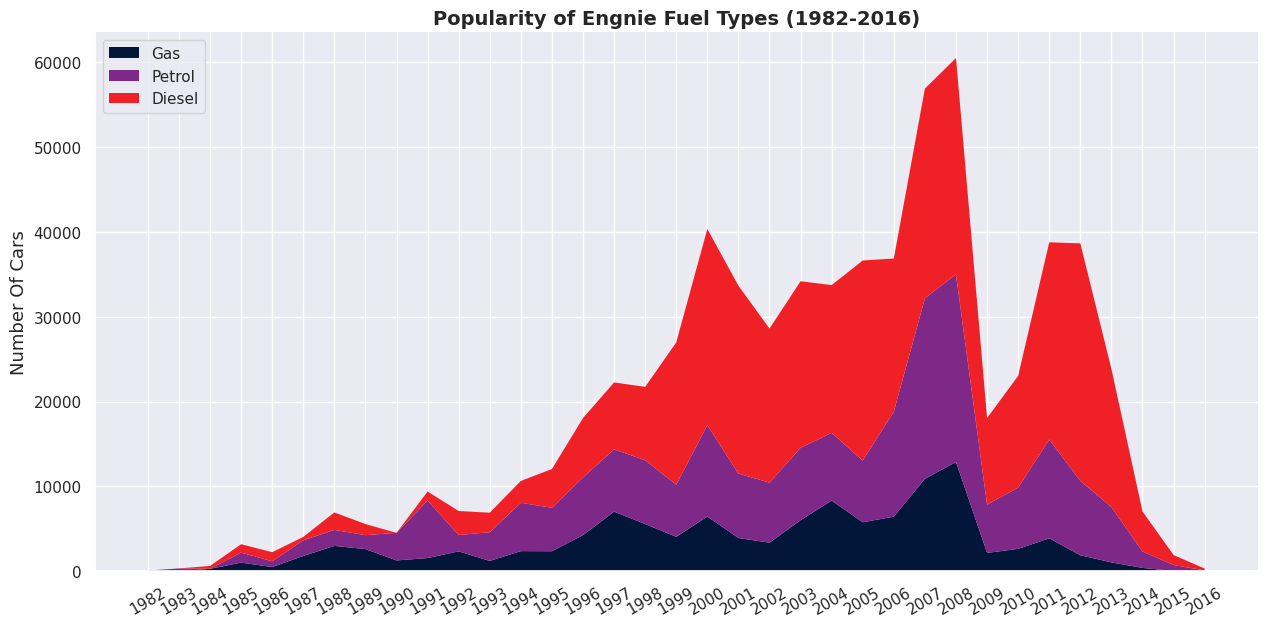

In [492]:
plt.figure(figsize=(15,7))
labels=['Gas','Petrol','Diesel']
colors=['#011638', '#7e2987', '#ef2026']
plt.stackplot(sdf['Year'],
              sdf['Gas'],
              sdf['Petrol'],
              sdf['Diesel'],
              colors=colors,
              edgecolor='none'
              )
plt.xticks(sdf['Year'], rotation=30)
plt.legend(labels=labels, loc='upper left')
plt.title('Popularity of Engnie Fuel Types (1982-2016)', fontsize=14, weight='bold')
plt.ylabel('Number Of Cars', fontsize=13)
sns.set_style('white') # setting the backgorung white
sns.despine() # removing the right & top border lines
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Stacked Area Chart.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

## 2. Stacked Area chart

In [493]:
source=pd.read_csv('/content/drive/MyDrive/area_chart_homework_data.csv')
source.head()

,Date,International,Domestic,Services,Unnamed: 4,Unnamed: 5
0,1/28/2020,3200,300,2000,NaN,NaN
1,2/28/2020,4500,500,2000,NaN,NaN
2,3/28/2020,3000,600,2000,NaN,NaN
3,4/28/2020,2800,500,2000,NaN,NaN
4,5/28/2020,5300,400,2000,NaN,NaN


Image saved successfully in drive


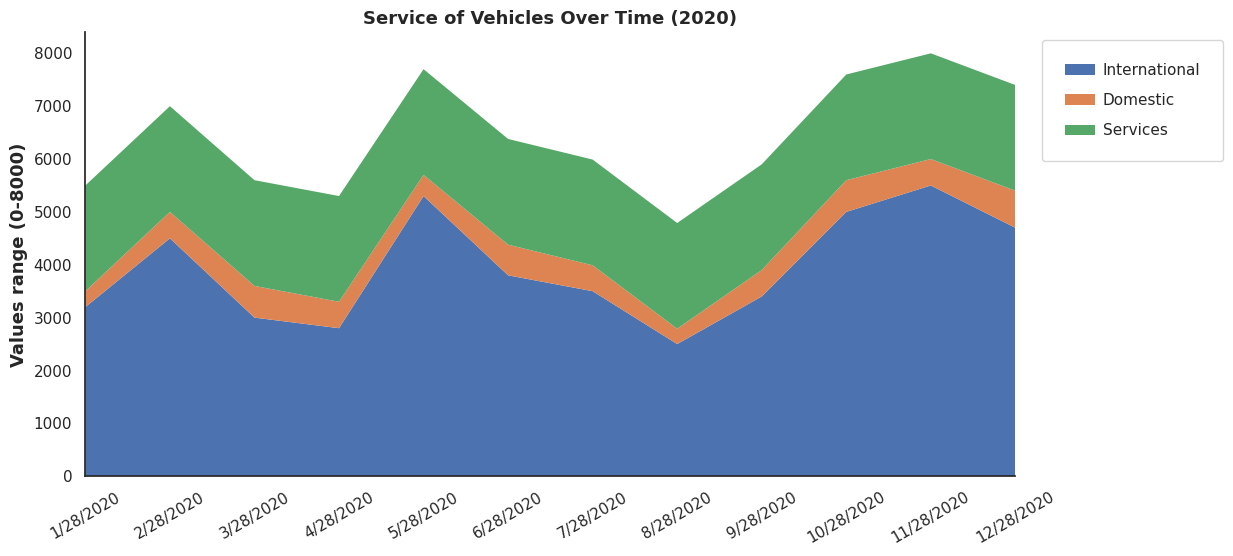

In [494]:
plt.figure(figsize=(12,6))
plt.stackplot(source['Date'],
              source['International'],
              source['Domestic'],
              source['Services'],
              edgecolor='none')
plt.xticks(rotation=30)
labels=['International', 'Domestic', 'Services']
plt.legend(
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderpad=1.5,       # space inside legend box
    labelspacing=1.0,    # space between legend items
    handletextpad=0.5    # space between color box and text
)
plt.margins(x=0)
plt.subplots_adjust(top=0.85)
sns.despine()
plt.title('Service of Vehicles Over Time (2020)', fontsize=13, weight='bold')
plt.ylabel('Values range (0-8000)', fontsize=13, weight='bold')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Stacked Area Chart-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# # 1. Line Chart




In [495]:
ldf=pd.read_csv('/content/drive/MyDrive/line_chart_data.csv')
ldf.head()

,Date,GSPC500,FTSE100
0,1/3/2000,0.003264,0.000000
1,1/4/2000,-0.009549,0.000000
2,1/5/2000,-0.038345,-0.038137
3,1/6/2000,0.001922,-0.019502
4,1/7/2000,0.000956,-0.013571


In [496]:
ldf['New_Date']=pd.to_datetime(ldf['Date'])
ldf['New_Date'].head()

,New_Date
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07


Image saved successfully in drive


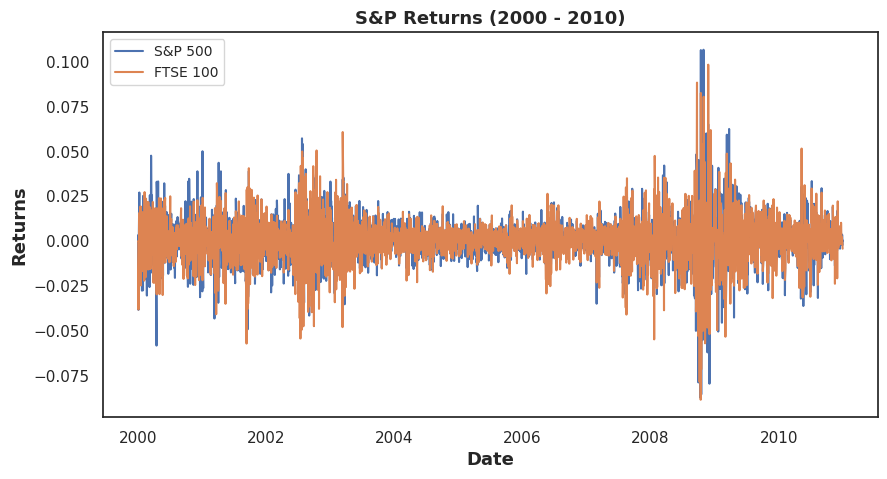

In [497]:
labels=['S&P 500', 'FTSE 100']
plt.figure(figsize=(10,5))
plt.plot(ldf['New_Date'], ldf['GSPC500'])
plt.plot(ldf['New_Date'], ldf['FTSE100'])
plt.title('S&P Returns (2000 - 2010)', fontsize=13, weight='bold')
plt.ylabel('Returns',  fontsize=13, weight='bold')
plt.xlabel('Date',  fontsize=13, weight='bold')
plt.legend(labels=labels, loc='upper left', fontsize=10)
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Line_Chart.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# # Splitting the JUL to DEC year 2008

In [498]:
ldf_2008 = ldf[(ldf.New_Date >= '2008-07-01' ) &
               (ldf.New_Date <= '2008-12-31' )]
ldf_2008.head()

,Date,GSPC500,FTSE100,New_Date
2216,7/1/2008,-0.001072,0.017360,2008-07-01
2217,7/2/2008,0.007151,-0.025951,2008-07-02
2218,7/3/2008,-0.017779,-0.009781,2008-07-03
2219,7/4/2008,0.000000,0.009270,2008-07-04
2220,7/7/2008,-0.000048,-0.011650,2008-07-07


Image saved successfully in drive


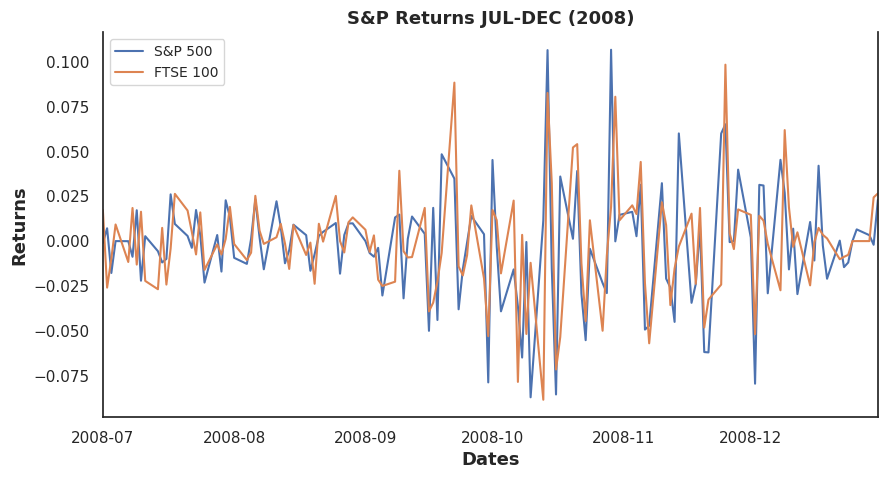

In [499]:
#labels=['S&P 500', 'FTSE 100']
plt.figure(figsize=(10,5))
plt.plot(ldf_2008['New_Date'], ldf_2008['GSPC500'])
plt.plot(ldf_2008['New_Date'], ldf_2008['FTSE100'])
plt.title('S&P Returns JUL-DEC (2008)', fontsize=13, weight='bold')
plt.ylabel('Returns',  fontsize=13, weight='bold')
plt.xlabel('Dates',  fontsize=13, weight='bold')
plt.legend(labels=labels, loc='upper left', fontsize=10)
plt.margins(x=0)
sns.despine(right=False)
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Line_Chart-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# # 1. Line Chart


In [500]:
demo=pd.read_csv('/content/drive/MyDrive/returns1020.csv')
demo

,Date,GSPCRet,FTSERet
0,1/1/2010,0.000000,0.000000
1,1/4/2010,-0.008912,0.000000
2,1/5/2010,0.014419,0.016147
3,1/6/2010,0.002693,0.004036
4,1/7/2010,0.000493,0.001358
...,...,...,...
2626,1/27/2020,-0.025784,0.010429
2627,1/28/2020,0.002522,-0.022924
2628,1/29/2020,0.010478,0.009255
2629,1/30/2020,-0.010035,0.000388


In [501]:
# Setting the Date format
demo['new_date']=pd.to_datetime(demo['Date'])
demo.tail(30)

,Date,GSPCRet,FTSERet,new_date
2601,12/23/2019,0.000844,0.001149,2019-12-23
2602,12/24/2019,-0.000186,0.005420,2019-12-24
2603,12/25/2019,0.000000,0.001128,2019-12-25
2604,12/26/2019,0.000543,0.000000,2019-12-26
2605,12/27/2019,0.006207,0.000000,2019-12-27
2606,12/30/2019,-0.002199,0.001664,2019-12-30
2607,12/31/2019,-0.007688,-0.007561,2019-12-31
2608,1/1/2020,0.000000,-0.005892,2020-01-01
2609,1/2/2020,0.009172,0.000000,2020-01-02
2610,1/3/2020,-0.005643,0.008207,2020-01-03


In [502]:
# Splitting the three year date
one_year=demo[(demo['new_date'] >= '2019-01-01') &
              (demo['new_date'] <= '2020-12-31')]

Image saved successfully in drive


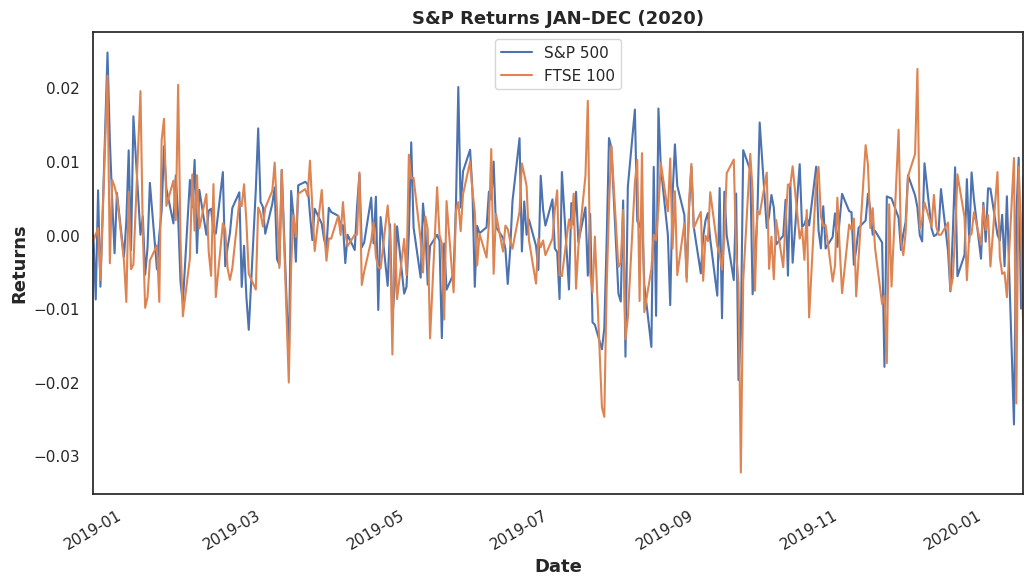

In [503]:
plt.figure(figsize=(12,6))
plt.plot(one_year['new_date'], one_year['GSPCRet'])
plt.plot(one_year['new_date'], one_year['FTSERet'])

plt.margins(x=0)
plt.xticks(rotation=30)
plt.xlabel('Date', fontsize=13, weight='bold')
plt.ylabel('Returns', fontsize=13, weight='bold')
plt.title('S&P Returns JAN–DEC (2020)', fontsize=13, weight='bold')
plt.legend(labels=labels, loc='upper center')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Line_Chart-3.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')


# # Histogram-1

In [504]:
his=pd.read_csv('/content/drive/MyDrive/histogram_data.csv')
his.head()

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
1,1029,1,2005.0,10.0,Apartment,29,756.21,246
2,2002,2,2007.0,7.0,Apartment,2,587.28,209
3,2031,2,2007.0,12.0,Apartment,31,1604.75,453
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467


Image saved successfully in drive


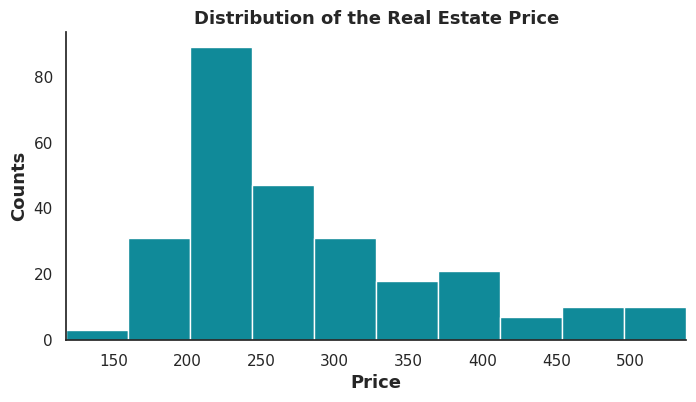

In [505]:
# Displaying the Price form the Data-Set
sns.set_style('white')
plt.figure(figsize=(8,4))
plt.hist(his['Price'],
         bins=10,
         color='#108A99')
plt.margins(x=0)
sns.despine()
plt.xlabel('Price', fontsize=13, weight='bold')
plt.ylabel("Counts", fontsize=13, weight='bold')
plt.title('Distribution of the Real Estate Price', fontsize=13, weight='bold')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Histogram_Chart.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# # Histogram-2

In [506]:
histo=pd.read_csv('/content/drive/MyDrive/histogram_survey_data.csv')
print(histo.shape)
histo.head()

(2000, 8)


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Image saved successfully in drive


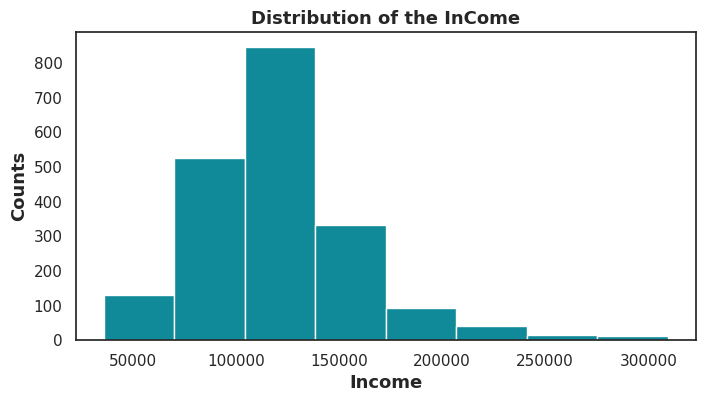

In [507]:
plt.figure(figsize=(8,4))
plt.hist(histo['Income'],
         bins=8,
         color='#108A99')
plt.xlabel('Income', fontsize=13, weight='bold')
plt.ylabel("Counts", fontsize=13, weight='bold')
plt.title('Distribution of the InCome', fontsize=13, weight='bold')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Histogram_Chart-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# # Scatter-Plot1

In [508]:
scat=pd.read_csv('/content/drive/MyDrive/scatter_data.csv')
scat

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246.17268,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246.33190,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209.28091,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452.66701,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467.08331,Sold
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,322.61074,Not Sold
263,5047,5,NaN,NaN,Apartment,47,794.52,279.19126,Not Sold
264,5048,5,NaN,NaN,Apartment,48,1013.27,287.99653,Not Sold
265,5050,5,NaN,NaN,Apartment,50,1074.71,365.86878,Not Sold


Image saved successfully in drive


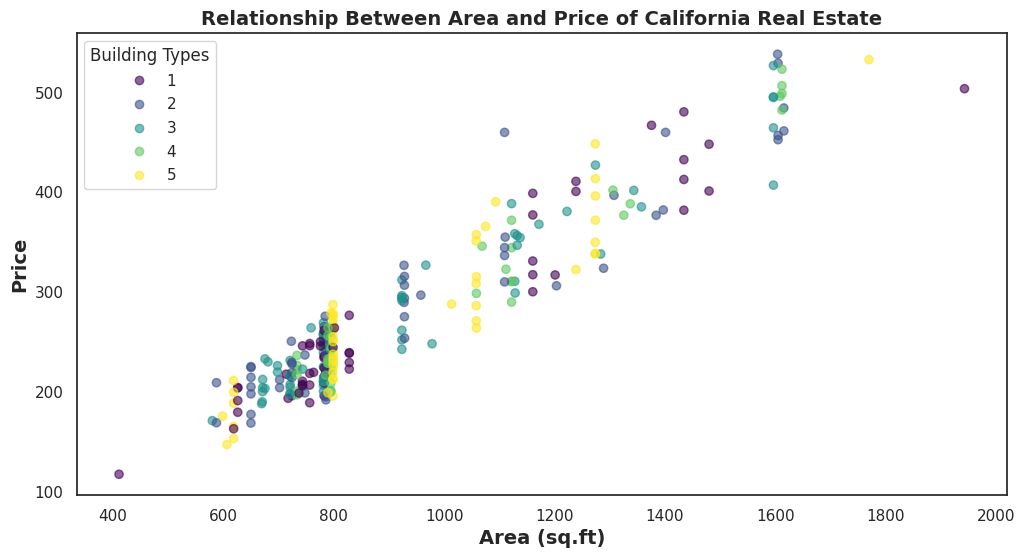

In [509]:
plt.figure(figsize=(12,6))
Scatter=plt.scatter(scat['Area (ft.)'],
            scat['Price'],
            alpha=0.6, # To controll the transperancy rnage(0-1)
            c=scat['Building Type'],
            cmap='viridis' # coloring
            )
plt.legend(*Scatter.legend_elements(),
           loc='upper left',
           title='Building Types')
plt.title('Relationship Between Area and Price of California Real Estate',
          fontsize=14,
          weight='bold')
plt.xlabel('Area (sq.ft)',fontsize=14, weight='bold')
plt.ylabel('Price',fontsize=14,weight='bold')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Scatter_Chart.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')


# # Same data visualize in seaborn

Image saved successfully in drive


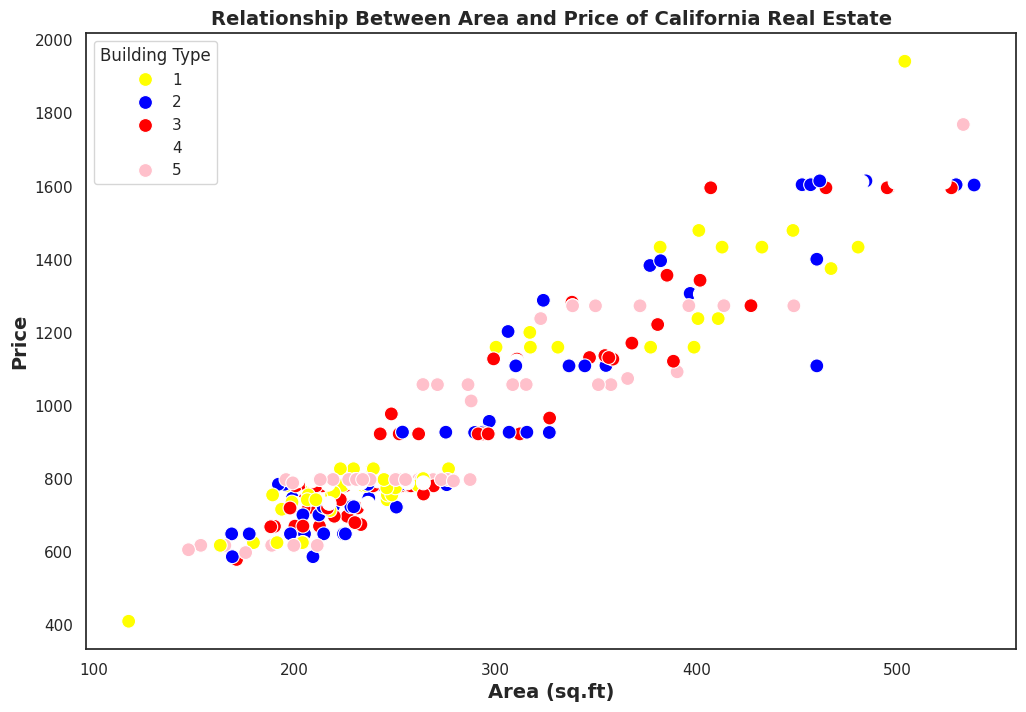

In [510]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=scat['Price'],
                y=scat['Area (ft.)'],
                hue=scat['Building Type'],
                palette=['yellow', 'blue', 'red', 'white', 'pink'],
                s=100 # saturation
                )
plt.title('Relationship Between Area and Price of California Real Estate',
          fontsize=14,
          weight='bold')
plt.xlabel('Area (sq.ft)',fontsize=14, weight='bold')
plt.ylabel('Price',fontsize=14,weight='bold')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Scatter_Chart-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# # Regression Plot

In [511]:
reg=pd.read_csv('/content/drive/MyDrive/scatter_plot_ii.csv')
reg.head()

,Budget,Sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


Image saved successfully in drive


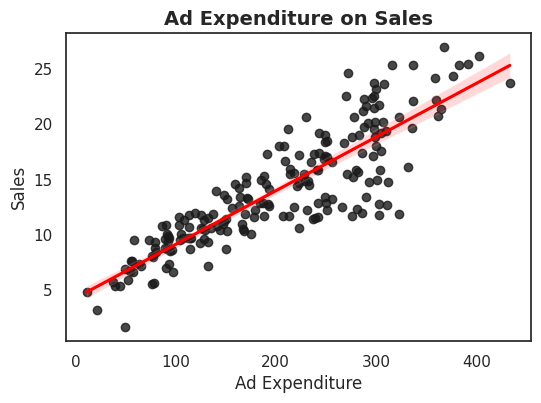

In [512]:
# regplot regression
plt.figure(figsize=(6,4))
sns.regplot(x=reg['Budget'],
            y=reg['Sales'],
            data=reg,
            # color='red'
            scatter_kws={'color':'k'},
            line_kws={'color':'red'}
            )
plt.title('Ad Expenditure on Sales',
          fontsize=14,
          weight='bold')
plt.xlabel('Ad Expenditure')
plt.ylabel('Sales')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Regression-regplot.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

Image saved successfully in drive


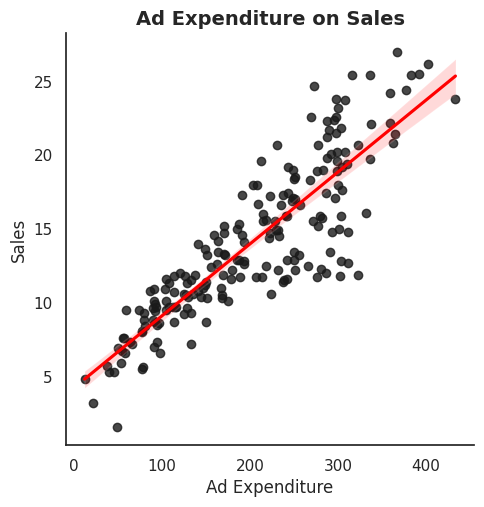

In [513]:
# lmplot regerssion
sns.lmplot(x='Budget',
           y='Sales',
           data=reg,
           scatter_kws={'color':'k'},
           line_kws={'color':'red'}
            )
plt.title('Ad Expenditure on Sales',
          fontsize=14,
          weight='bold')
plt.xlabel('Ad Expenditure')
plt.ylabel('Sales')
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Regression-lmplot.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

#  Regression Plot-2

In [514]:
reg_plt=pd.read_csv('/content/drive/MyDrive/scatter_data.csv')
reg_plt.head()

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246.17268,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246.33190,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209.28091,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452.66701,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467.08331,Sold


Image saved successfully in drive


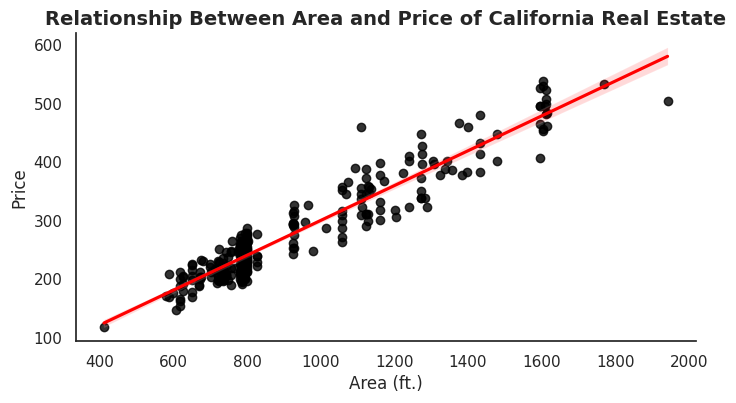

In [515]:
plt.figure(figsize=(8,4))
sns.regplot(x=reg_plt['Area (ft.)'],
            y=reg_plt['Price'],
            scatter_kws={'color':'black'},
            line_kws={'color':'red'})
plt.title('Relationship Between Area and Price of California Real Estate',
          fontsize=14,
          weight='bold')
sns.despine()
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Regression-regplt-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

Image saved successfully in drive


<Figure size 1800x400 with 0 Axes>

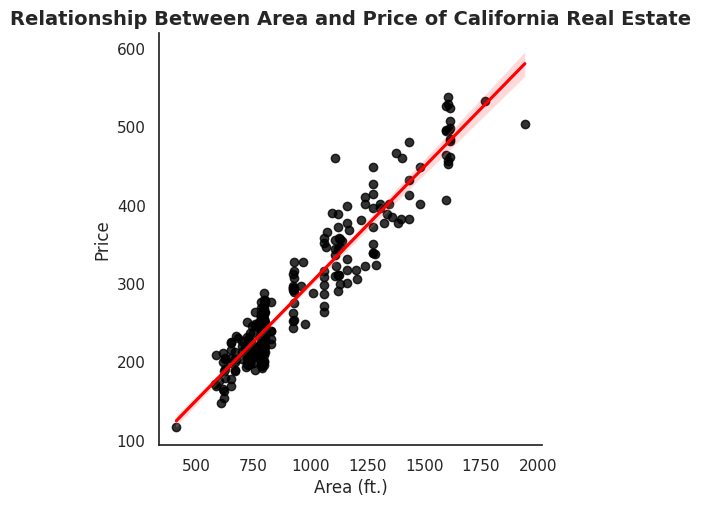

In [516]:
plt.figure(figsize=(18,4))
sns.lmplot(x='Area (ft.)',
           y='Price',
           data=reg_plt,
           scatter_kws={'color':'black'},
           line_kws={'color':'red'})
plt.title('Relationship Between Area and Price of California Real Estate',
          fontsize=14,
          weight='bold')
sns.despine()
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/regression-lmplot-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

# Bar and Line Chart

In [517]:
bl_plt=pd.read_csv('/content/drive/MyDrive/bar_line_chart_data.csv')
bl_plt.head()

,Year,Python Users,Participants
0,2012,0.149,798
1,2013,0.133,1880
2,2014,0.195,3285
3,2015,0.303,2800
4,2016,0.458,2895


Image saved successfully in drive


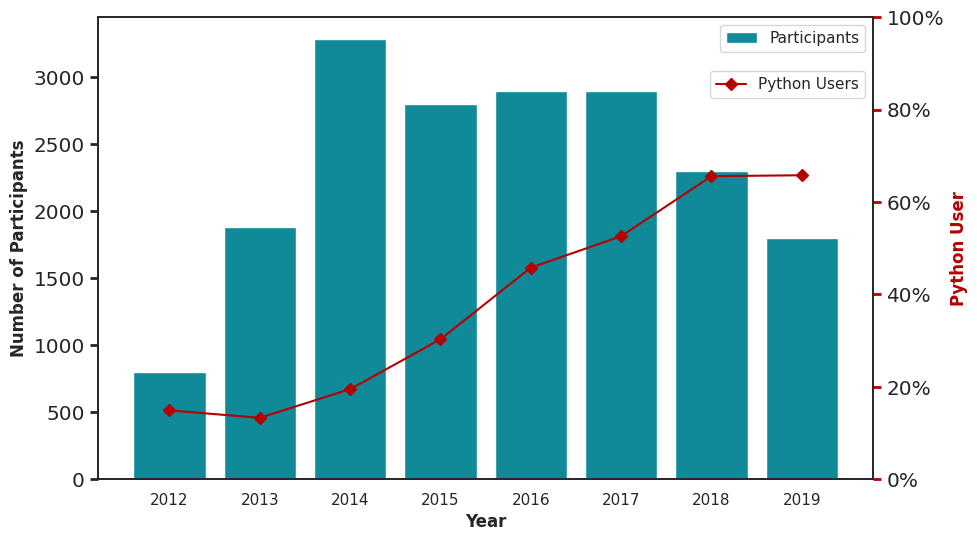

In [518]:
from matplotlib.patches import bbox_artist
sns.set_style('white')
fig, ax =plt.subplots(figsize=(10,6))

ax.bar(bl_plt['Year'],
       bl_plt['Participants'],
       color='#108A99')
ax.set_ylabel('Number of Participants', weight='bold')
ax.tick_params(axis='y',
               width=2,
               labelsize='large')
ax.set_xlabel('Year',
              weight='bold')
ax1=ax.twinx()
ax1.set_ylim(0,1)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax1.plot(bl_plt['Year'],
         bl_plt['Python Users'],
         color='#b60000',
         marker='D')

ax1.set_ylabel('Python User',
               color='#b60000',
               weight='bold')
ax1.tick_params(axis='y',
               color='#b60000',
               width=2,
               labelsize='large')

ax.legend(['Participants'],
           loc='upper right')
ax1.legend(['Python Users'],
           loc='upper right',
           bbox_to_anchor=(1, 0.9))
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Bar-Line_Chart.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')

In [519]:
bar_line=pd.read_csv('/content/drive/MyDrive/bar_line_chart_homework.csv')
bar_line

,Movie Theater Goers Complaints,Number of complaints,frequency
0,Poor Projection Quality,3821,0.727532
1,Bad Volume,684,0.857768
2,Screen Size,298,0.914509
3,Bad Seats,232,0.958682
4,Queues,217,1.000000


Image saved successfully in drive


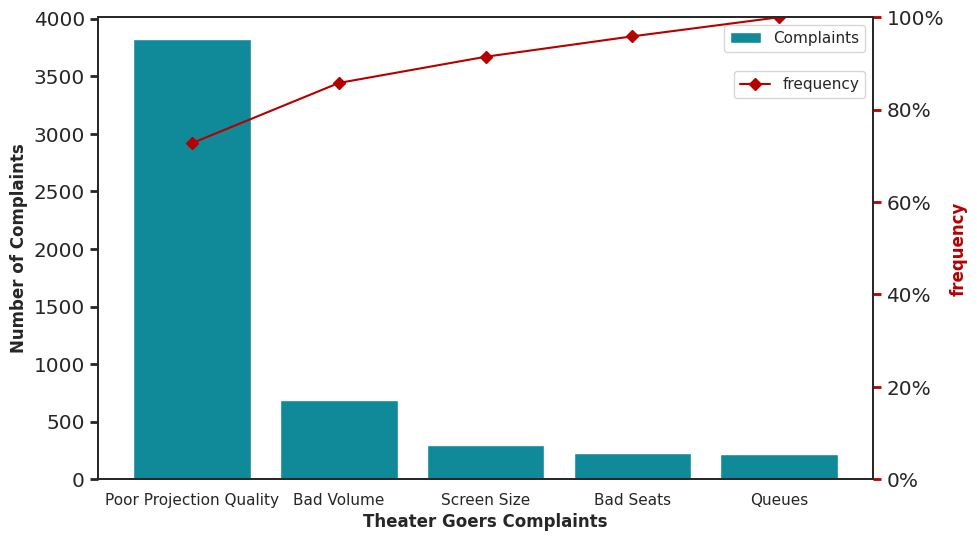

In [520]:
sns.set_style('white')
fig, ax =plt.subplots(figsize=(10,6))

ax.bar(bar_line['Movie Theater Goers Complaints'],
       bar_line['Number of complaints'],
       color='#108A99')
ax.set_ylabel('Number of Complaints', weight='bold')
ax.tick_params(axis='y',
               width=2,
               labelsize='large')
ax.set_xlabel('Theater Goers Complaints',
              weight='bold')
ax1=ax.twinx()
ax1.set_ylim(0,1)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax1.plot(bar_line['Movie Theater Goers Complaints'],
         bar_line['frequency'],
         color='#b60000',
         marker='D')

ax1.set_ylabel('frequency',
               color='#b60000',
               weight='bold')
ax1.tick_params(axis='y',
               color='#b60000',
               width=2,
               labelsize='large')

ax.legend(['Complaints'],
           loc='upper right')
ax1.legend(['frequency'],
           loc='upper right',
           bbox_to_anchor=(1, 0.9))
try:
  plt.savefig('/content/drive/MyDrive/Data-Visualization/Bar-Line-Chart-2.png') # saving as a PNG Image
  print('Image saved successfully in drive')
  plt.show()
except Exception as e:
  print(f'Unable to save the Image \n {e}')